# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf

import re
import string
from string import digits
import pickle

# Loading the data

In [2]:
df = pd.read_csv('Hindi_English_Truncated_Corpus.csv', encoding='utf-8')
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


# Preprocess the data

In [3]:
# count the specific values in source column
df['source'].value_counts()

tides        50000
ted          39881
indic2012    37726
Name: source, dtype: int64

In [4]:
# filter data by keeing only rows with red source
df = df[df['source'] == 'ted']
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13,ted,So there is some sort of justice,तो वहाँ न्याय है


In [5]:
# resetting index after filtering the data
df.reset_index(inplace=True, drop=True)
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
3,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
4,ted,So there is some sort of justice,तो वहाँ न्याय है


In [6]:
# taking only required columns
required_columns = ['english_sentence', 'hindi_sentence']
df = df[required_columns]

In [7]:
df.head()

,english_sentence,hindi_sentence
0,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
3,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
4,So there is some sort of justice,तो वहाँ न्याय है


In [8]:
# checking for the null values
df.isnull().sum()

english_sentence    0
hindi_sentence      0
dtype: int64

In [9]:
# checking for the duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39876    False
39877    False
39878     True
39879    False
39880    False
Length: 39881, dtype: bool

In [10]:
# checking the shape of the dataframe
df.shape

(39881, 2)

In [11]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [12]:
# checking the shape of dataframes after removing the duplicates
df.shape

(38803, 2)

In [13]:
# getting names of the columns present
df.columns

Index(['english_sentence', 'hindi_sentence'], dtype='object')

In [14]:
# lower case all the characters
df['english_sentence'] = df['english_sentence'].apply(lambda x: x.lower())
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: x.lower())

In [15]:
# remove quotes
df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub("'", '', x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub("“", '', x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("“", '', x))

df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub("”", '', x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("”", '', x))

In [16]:
# set of punctuations
exclude = set(string.punctuation)

# remove all the special characters
df['english_sentence'] = df['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [17]:
# trans of all the numbers
remove_digits = str.maketrans('', '', digits)

# remove all the digits
df['english_sentence'] = df['english_sentence'].apply(lambda x: x.translate(remove_digits))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: x.translate(remove_digits))

# remove hindi digits
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

In [18]:
# remove extra spaces
df['english_sentence'] = df['english_sentence'].apply(lambda x: x.strip())
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: x.strip())

df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [19]:
# add START and END token to the target string
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: 'START_ ' + x + ' _END')

In [20]:
df.head()

,english_sentence,hindi_sentence
0,politicians do not have permission to do what ...,START_ राजनीतिज्ञों के पास जो कार्य करना चाहिए...
1,id like to tell you about one such child,START_ मई आपको ऐसे ही एक बच्चे के बारे में बता...
2,what we really mean is that theyre bad at not ...,START_ हम ये नहीं कहना चाहते कि वो ध्यान नहीं ...
3,and who are we to say even that they are wrong,START_ और हम होते कौन हैं यह कहने भी वाले कि व...
4,so there is some sort of justice,START_ तो वहाँ न्याय है _END


In [21]:
# function to get the vocabulary of the words
def get_vocab(df, col):
    vocab = set()
    for sent in df[col]:
        for word in sent.split():
            if word not in vocab:
                vocab.add(word)
    return vocab

In [22]:
# get the vocabulary of the english word
all_eng_words = get_vocab(df, 'english_sentence')
all_hindi_words = get_vocab(df, 'hindi_sentence')

In [23]:
len(all_eng_words), len(all_hindi_words)

(16293, 21587)

In [24]:
# length of the sentences
df['length_eng_sentence'] = df['english_sentence'].apply(lambda x: len(x.split()))
df['length_hin_sentence'] = df['hindi_sentence'].apply(lambda x: len(x.split()))

In [25]:
df.head()

,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
0,politicians do not have permission to do what ...,START_ राजनीतिज्ञों के पास जो कार्य करना चाहिए...,12,15
1,id like to tell you about one such child,START_ मई आपको ऐसे ही एक बच्चे के बारे में बता...,9,13
2,what we really mean is that theyre bad at not ...,START_ हम ये नहीं कहना चाहते कि वो ध्यान नहीं ...,12,13
3,and who are we to say even that they are wrong,START_ और हम होते कौन हैं यह कहने भी वाले कि व...,11,15
4,so there is some sort of justice,START_ तो वहाँ न्याय है _END,7,6


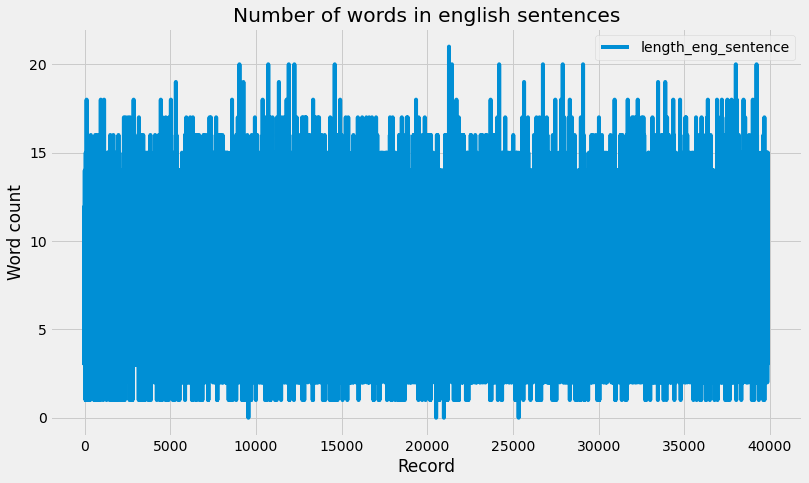

In [26]:
# plot for the number of words in the english sentence
plt.figure(figsize=(12, 7))
df['length_eng_sentence'].plot()
plt.title('Number of words in english sentences')
plt.xlabel('Record')
plt.ylabel('Word count')
plt.legend()
plt.show()

In [27]:
# removing all the records whose length is 0 or greater then 20
df = df[df['length_eng_sentence'] <= 20]
df = df[df['length_eng_sentence'] > 0]

In [28]:
df.shape

(38798, 4)

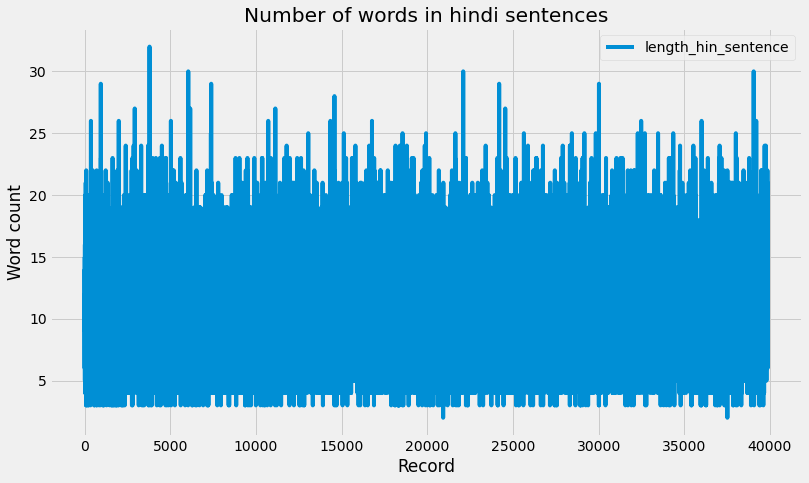

In [29]:
# plot for the number of words in the hindi sentence
plt.figure(figsize=(12, 7))
df['length_hin_sentence'].plot()
plt.title('Number of words in hindi sentences')
plt.xlabel('Record')
plt.ylabel('Word count')
plt.legend()
plt.show()

In [30]:
# removing all the records whose length is 0 or greater then 20
df = df[df['length_hin_sentence'] <= 20]
df = df[df['length_hin_sentence'] > 0]

In [31]:
df.shape

(38473, 4)

In [32]:
max_length_src = df['length_eng_sentence'].max()
max_length_tar = df['length_hin_sentence'].max()

print("Maximum length of english sentence:", max_length_src)
print("Maximum length of hindi sentence:", max_length_tar)

Maximum length of english sentence: 20
Maximum length of hindi sentence: 20


In [33]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))

num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)

num_encoder_tokens, num_decoder_tokens

(16293, 21587)

In [34]:
# adding zero padding in decoder
num_decoder_tokens += 1

In [35]:
# creating dictionary of index for input and target words
input_token_index = dict((word, i+1) for i, word in enumerate(input_words))
target_token_index = dict((word, i+1) for i, word in enumerate(target_words))

In [36]:
# creating dictionary of index for input and target words in reverse format
reverse_input_token_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_token_index = dict((i, word) for word, i in target_token_index.items())

# Pickle the required information

In [37]:
pickle.dump(max_length_src, open("pickle_data/max_length_src.pkl", "wb"))
pickle.dump(max_length_tar, open("pickle_data/max_length_tar.pkl", "wb"))
pickle.dump(num_decoder_tokens, open("pickle_data/num_decoder_tokens.pkl", "wb"))
pickle.dump(input_token_index, open("pickle_data/input_token_index.pkl", "wb"))
pickle.dump(target_token_index, open("pickle_data/target_token_index.pkl", "wb"))
pickle.dump(reverse_target_token_index, open("pickle_data/reverse_target_token_index.pkl", "wb"))

In [38]:
df = shuffle(df)
df.head()

,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
21372,of that abnormality in the brain,START_ जड़ का पता लगता है _END,6,7
39733,and whats under that,START_ और उसके नीचे जो है _END,4,7
3571,this is what its like to go to a news stand al...,START_ किसी पत्रिकाओं के दुकान में जाने का अनु...,13,14
26566,that i can answer with an uncontroversial answer,START_ जिसका ज़वाब मैं गैरविवादास्पद रूप में द...,8,11
24417,so you have a sense of what the americans are ...,START_ तो आपको ये पता है के अमरीकी लोग केसा सो...,11,16


# Split the data

In [39]:
X, y = df['english_sentence'], df['hindi_sentence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((30778,), (7695,))

# Save the data

In [40]:
X_train.to_pickle('pickle_data/X_train.pkl')
y_train.to_pickle('pickle_data/y_train.pkl')

X_test.to_pickle('pickle_data/X_test.pkl')
y_test.to_pickle('pickle_data/y_test.pkl')

# Load the data

In [41]:
X_train = pickle.load(open('pickle_data/X_train.pkl', 'rb'))
y_train = pickle.load(open('pickle_data/y_train.pkl', 'rb'))

X_test = pickle.load(open('pickle_data/X_test.pkl', 'rb'))
y_test = pickle.load(open('pickle_data/y_test.pkl', 'rb'))

In [42]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# Encoder decoder architecture

In [43]:
latent_dim = 300

In [44]:
# encoder
encoder_inputs = tf.keras.layers.Input(shape=(None,))
enc_emb = tf.keras.layers.Embedding(num_encoder_tokens, latent_dim, mask_zero=True)(encoder_inputs)
encoder_lstm = tf.keras.layers.LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# discard the 'encoder_outputs' and only keep the states
encoder_states = [state_h, state_c]

In [45]:
# decoder, using 'encoder_states' as initial states
decoder_inputs = tf.keras.layers.Input(shape=(None,))
dec_emb_layer = tf.keras.layers.Embedding(num_decoder_tokens, latent_dim, mask_zero=True)
dec_emb = dec_emb_layer(decoder_inputs)

# setup decoder to return full ouput sequences,
# and to return internal states as well. We don't use the
# return states in the training mode, but we will use them in inference
decoder_lstm = tf.keras.layers.LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [46]:
# model that will turn
# 'encoder_input' data & 'decoder_input' data into 'decocer_target' data
model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [47]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

In [48]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 300)    4887900     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 300)    6476400     input_2[0][0]                    
______________________________________________________________________________________________

In [49]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 100

In [50]:
train_samples//batch_size, val_samples//batch_size

(240, 60)

In [51]:
model.fit_generator(generator=generate_batch(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=train_samples//batch_size,
                    epochs=epochs,
                    validation_data=generate_batch(X_test, y_test, batch_size=batch_size),
                    validation_steps=val_samples//batch_size)

C:\Users\Yash_Jain1\.conda\envs\tf-gpu\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
240/240 [==============================] - 108s 393ms/step - loss: 2.9320 - val_loss: 2.7592
Epoch 2/100
240/240 [==============================] - 97s 403ms/step - loss: 2.6131 - val_loss: 2.5848
Epoch 3/100
240/240 [==============================] - 105s 437ms/step - loss: 2.4505 - val_loss: 2.5036
Epoch 4/100
240/240 [==============================] - 104s 432ms/step - loss: 2.3345 - val_loss: 2.4387
Epoch 5/100
240/240 [==============================] - 117s 488ms/step - loss: 2.2330 - val_loss: 2.4022
Epoch 6/100
240/240 [==============================] - 159s 662ms/step - loss: 2.1448 - val_loss: 2.3622
Epoch 7/100
240/240 [==============================] - 142s 593ms/step - loss: 2.0631 - val_loss: 2.3476
Epoch 8/100
240/240 [==============================] - 122s 507ms/step - loss: 1.9882 - val_loss: 2.3283
Epoch 9/100
240/240 [==============================] - 114s 474ms/step - loss: 1.9174 - val_loss: 2.3218
Epoch 10/100
240/240 [==============================] - 

In [52]:
model.save_weights('weights/weights_machine_translation.h5')

In [53]:
# encode the input sequence to get the "thought vectors"
encoder_model = tf.keras.Model(encoder_inputs, encoder_states)

# decoder setup
# tensors will hold the states of the precious time step
decoder_state_input_h = tf.keras.layers.Input(shape=(latent_dim,))
decoder_state_input_c = tf.keras.layers.Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# get the embedding of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# to predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# dense softmax layer to generate prob dist over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2)

# final decoder model
decoder_model = tf.keras.Model([decoder_inputs] + decoder_states_inputs,
                               [decoder_outputs2] + decoder_states2)

In [54]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 300)         4887900   
_________________________________________________________________
lstm (LSTM)                  [(None, 300), (None, 300) 721200    
Total params: 5,609,100
Trainable params: 5,609,100
Non-trainable params: 0
_________________________________________________________________


In [55]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 300)    6476400     input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 300)]        0                                            
____________________________________________________________________________________________

# Save the model

In [56]:
encoder_model.save("encoder_model")
decoder_model.save("decoder_model")

INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: encoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


INFO:tensorflow:Assets written to: decoder_model\assets


In [57]:
def decode_sequence(input_seq):
    # encode the input as state vectors
    states_value = encoder_model.predict(input_seq)
    # generate empty target sequence of length 1
    target_seq = np.zeros((1,1))
    # populate the first character of target sequence with the start character
    target_seq[0,0] = target_token_index['START_']
    
    # sampling loop for a batch of sequence
    # (to simplify, here we assume a batch of size 1)
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        
        # sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_token_index[sampled_token_index]
        decoded_sentence += ' ' + sampled_char
        
        # exit condition: either hit max length or find stop character
        if (sampled_char == '_END' or len(decoded_sentence) > 50):
            stop_condition = True
            
        # update the target sequence (of length 1)
        target_seq = np.zeros((1,1))
        target_seq[0,0] = sampled_token_index
        
        # update states
        states_value = [h, c]
        
    return decoded_sentence

In [58]:
train_gen = generate_batch(X_train, y_train, batch_size=1)
k = -1

In [59]:
for _ in range(5):
    k += 1
    (input_seq, actual_output), _ = next(train_gen)
    decoded_sentence = decode_sequence(input_seq)
    print('Input English sentence:', X_train[k:k+1].values[0])
    print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
    print('Predicted Hindi Translation:', decoded_sentence[:-4])
    print('\n\n')

Input English sentence: we print geometry where we can make industrial design objects
Actual Hindi Translation:  जहां हम औद्योगिक डिजाइन वस्तुओं को छाप सकते हैं 
Predicted Hindi Translation:  जहां हम औद्योगिक डिजाइन वस्तुओं और बिजली में सकते



Input English sentence: a few oxymorons in one sentence
Actual Hindi Translation:  और ये वाक्य विरोधाभास से भरा है। 
Predicted Hindi Translation:  और ये वाक्य वाक्य करने वाले मिलता है 



Input English sentence: but they would give her the broccoli if she liked the broccoli
Actual Hindi Translation:  और गोभी देते थे अगर उसे गोभी पसंद थी। 
Predicted Hindi Translation:  और उन्हें दुकान में थे वो कंप्यूटर के बाद 



Input English sentence: and on top of all off these rules
Actual Hindi Translation:  और अगर ये नियमों काफी नहीं हैं 
Predicted Hindi Translation:  और उन पर अधिकांश लोगों वे सच हैं 



Input English sentence: someday little robots will go
Actual Hindi Translation:  एक दिन छोटे रोबोट्स हमारी धमनियों 
Predicted Hindi Translation:  एक दिन छ